<a href="https://colab.research.google.com/github/iobis/pyobis/blob/main/notebooks/biodiversity_mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Taxa mapping

Search for the order Scleractinia and extract all records. We will use `pyobis` to fetch data and then visualize.

Searching the order [Scleractinia](https://www.marinespecies.org/aphia.php?p=taxdetails&id=1363) and drill down to all species.

AphiaID 1363 (urn:lsid:marinespecies.org:taxname:1363)

## installing pyobis

In [1]:
try:
  import pyobis
except:
  %pip -q install pyobis
  import pyobis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 2.7 MB/s eta 0:00:00


## grabbing the data

Since our analysis will depend on the depth parameter, we will choose only non NaN values.

In [2]:
from pyobis import occurrences

# Search for occurrences
# Scleractinia == taxon 1363
query = occurrences.search(taxonid=1363, startdepth=0, enddepth=30)  # 0-30 meters
df = query.execute()
# it returns a pandas DataFrame object

In [3]:
# let's see what we got
df.head()

,basisOfRecord,class,classid,continent,country,countryCode,county,datasetID,date_end,date_mid,...,establishmentMeans,originalNameUsage,genericName,infraspecificEpithet,eventType,forma,formaid,informationWithheld,variety,varietyid
0,HumanObservation,Hexacorallia,1340,SA,Colombia,CO,Cartagena de Indias,INVEMAR:SIMAC:2010,1.290643e+12,1.290643e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MaterialSample,Hexacorallia,1340,NaN,NaN,NaN,NaN,dassh.ac.uk:jncc_mr_snapshot_whole_uk_3,1.250986e+12,1.250986e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HumanObservation,Hexacorallia,1340,NaN,Puerto Rico,PR,NaN,PRCRMP_database,1.496189e+12,1.494893e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HumanObservation,Hexacorallia,1340,NaN,NaN,NaN,NaN,NaN,1.270685e+12,1.270685e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HumanObservation,Hexacorallia,1340,NaN,NaN,NaN,NaN,NaN,1.224634e+12,1.224634e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## visualization

### 1. year-wise distribution
Let us see the year-wise distribution of records.

In [6]:
# install & import modules
# **Known Bug**: Need to reinstall shapely on Google Colab since it causes crash. And then restart once.
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

try:
  import geoplot
except:
  %pip -q install geoplot
  import geoplot

try:
  import geopandas as gpd
except:
  %pip -q install geopandas
  import geopandas as gpd

try:
    import geodatasets
except:
  %pip -q install geodatasets
  import geodatasets

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

!pip uninstall shapely
!pip install shapely --no-binary shapely

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.1.2-cp312-cp312-linux_x86_64.whl size=1296719 sha256=723fb3d4cc9f72a13147fcf0c683f4447e7e5317ccd6929de6d2eef914f2cbdc
  Stored in directory: /root/.cache/pip/wheels/e9/38/c7/6f4f8e2dc4abc29e31467a46546a15559efb2b735ab460b46d
Successfully built shapely


In [7]:
# setting up seaborn
sns.set(style="darkgrid", rc={'figure.figsize':(25,8)})
# getting the basemap
countries = gpd.read_file(geodatasets.get_path("naturalearth.land"))

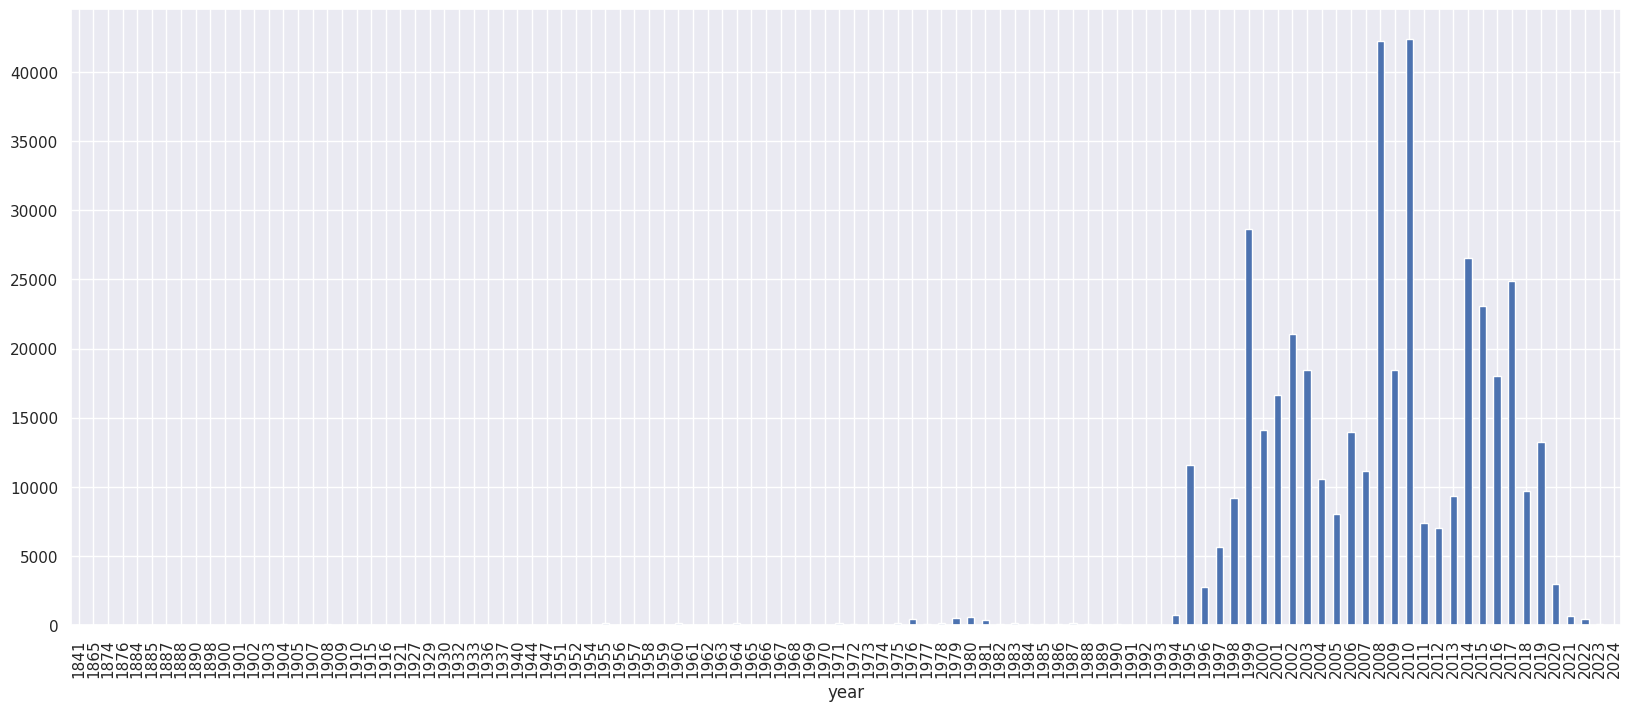

In [8]:
ax = df.groupby("year").date_mid.count().plot.bar(figsize = (20,8))

We can see from the plot that 2010 has got the highest number of records. Although there is a lot of variation yet the number of records has risen significatly after 1995 in comparison to the earlier years where the data is almost negligible.

### based on point density

In [9]:
# convert to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.decimalLongitude, df.decimalLatitude),
    crs="EPSG:4326")

In [10]:
from matplotlib import rcParams
rcParams["figure.figsize"] = (15,10)

In [11]:
try:
  import regionmask
except:
  %pip -q install regionmask
  import regionmask

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 940.6 kB/s eta 0:00:00


In [12]:
basins = regionmask.defined_regions.natural_earth_v5_0_0.ocean_basins_50.to_geodataframe()
basins = basins.dissolve()

SHA256 hash of downloaded file: 3f6a7970c301bc5dca5e8bd565af4c6f6d1bd92e903cafde9c42b4cd944e06a4
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
Unzipping contents of '/root/.cache/regionmask/natural_earth/v5.0.0/ne_50m_geography_marine_polys.zip' to '/root/.cache/regionmask/natural_earth/v5.0.0/ne_50m_geography_marine_polys'
/tmp/ipython-input-2604411118.py:1: UserWarning: `natural_earth_v5_0_0.ocean_basins_50` does not quite extend to 180°E - it's recommended to use `natural_earth_v5_1_2.ocean_basins_50` instead. See https://github.com/regionmask/regionmask/issues/410.
  basins = regionmask.defined_regions.natural_earth_v5_0_0.ocean_basins_50.to_geodataframe()


/usr/local/lib/python3.12/dist-packages/geoplot/geoplot.py:708: UserWarning: Could not set plot extent successfully due to numerical instability. Try setting extent manually. Defaulting to a global extent.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:842: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.set_ylim([y1, y2])


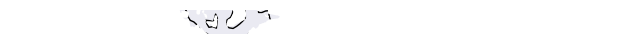

In [19]:
ax = geoplot.polyplot(countries, projection=geoplot.crs.WebMercator())
geoplot.kdeplot(gdf, cmap='Reds', fill=True, clip=basins, ax=ax);

### with latitude and longitude stacked side-by-side

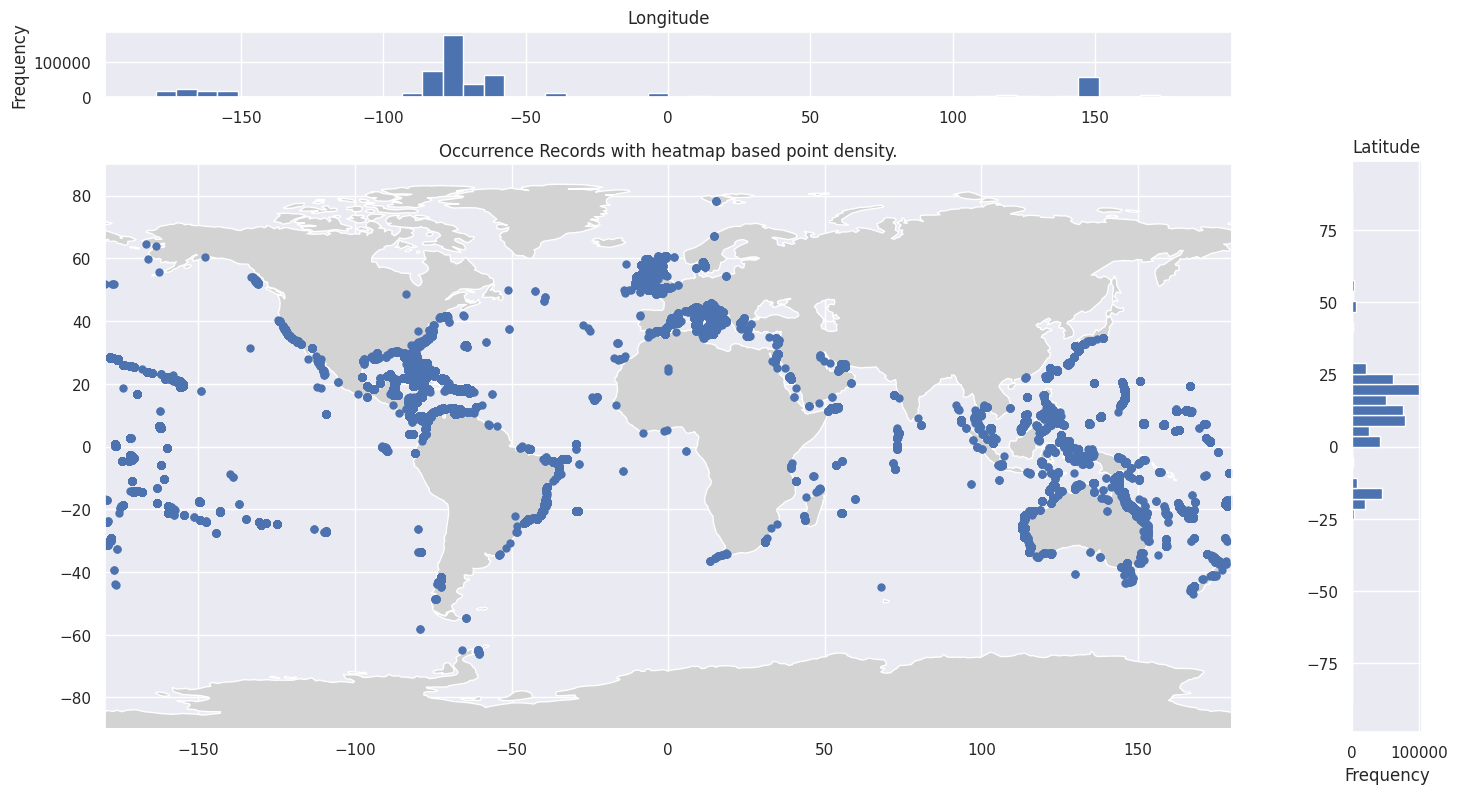

In [14]:
f, axes = plt.subplots(2, 2, figsize=(17,9.1), gridspec_kw={'width_ratios': [16, 1], 'height_ratios': [1, 8.7]})
df["decimalLongitude"].astype(int).plot.hist(ax=axes[0][0], bins=50, range=(-180, 180))
axes[0][0].set_title("Longitude")

axes[0][1].set_facecolor('white')
axes[0][1].tick_params(left=False, bottom=False, labelbottom=False, labelleft=False)

countries.plot(color="lightgrey", figsize=(16, 8.4), ax = axes[1][0])
sns.scatterplot(data=df, x="decimalLongitude", y="decimalLatitude", linewidth=0, ax=axes[1][0])

axes[1][0].set_xlim(-180,180)
axes[1][0].set_ylim(-90, 90)
axes[1][0].set_title("Occurrence Records with heatmap based point density.")
axes[1][0].set_xlabel("")
axes[1][0].set_ylabel("")
df["decimalLatitude"].astype(int).plot.hist(orientation='horizontal', ax=axes[1][1], bins=50, range=(-90, 90))

axes[1][1].set_title("Latitude")
plt.show()

--------------------
--------------------

## Dynamic Plot

In [15]:
# defining areas of outputs
map_out = widgets.Output(layout={'border': '1px solid black', 'padding': '0 4px 15px 4px'})
map_out.append_stdout('map output\n')

graph_out = widgets.Output(layout={'border': '1px solid black', 'padding': '0 0 15px 4px'})
graph_out.append_stdout('graph output\n')

zoom_out = widgets.Output(layout={'border': '1px solid black', 'padding': '0 4px 15px 0'})
zoom_out.append_stdout('set a (lat, lon) to view zoom view\n')

In [16]:
# setting the buttons and fields
taxonInput = widgets.IntText(description="Enter Taxon ID", value = 1363)
taxonButton = widgets.Button(description="Fetch Data")
graph = widgets.Button(description="Show graph")
map = widgets.Button(description="Show map")
zoom_button = widgets.Button(description="Open zoomed")
ilats = widgets.IntText(description="Lat.")
ilons = widgets.IntText(description="Long.")
zoom = widgets.IntText(description="Zoom by:", value=20)

In [17]:
# defining click events
def on_taxon_updated(b):
  req = occ.search(taxonid = taxonInput.value, startdepth = -2000)
  df = pd.DataFrame(req["results"])

@map_out.capture()
def on_map_clicked(b):
  map_out.clear_output()
  countries.plot(color="grey", figsize=(11,6))
  plt.title("records")
  wmap = plt.scatter(data=df, x="decimalLongitude", y="decimalLatitude", c=df["depth"], cmap="coolwarm")
  plt.xlabel("")
  plt.ylabel("")
  plt.colorbar(wmap)
  plt.show()

@zoom_out.capture()
def on_zoom_clicked(b):
  zoom_out.clear_output()
  ax = countries.plot(color="lightgrey")
  plt.scatter(data=df, x="decimalLongitude", y="decimalLatitude", c=df["depth"], cmap="coolwarm")
  plt.rc('figure',figsize=(5,5))
  plt.xlabel("")
  plt.ylabel("")
  plt.title(f"zoomed around {ilons.value, ilats.value}")
  ax.set_xlim(ilons.value-zoom.value,ilons.value+zoom.value)
  ax.set_ylim(ilats.value-zoom.value,ilats.value+zoom.value)
  plt.show()

@graph_out.capture()
def on_graph_clicked(b):
  graph_out.clear_output()
  plt.figure(figsize=(5,2.2))
  plt.title("records histogram");
  sns.histplot(df["decimalLatitude"].astype(int), kde=True)
  plt.figure(figsize=(5,2.2))
  sns.histplot(df["decimalLongitude"].astype(int), kde=True)
  graph_out.append_stdout(plt.show())

taxonButton.on_click(on_taxon_updated)
graph.on_click(on_graph_clicked)
map.on_click(on_map_clicked)
zoom_button.on_click(on_zoom_clicked)

Let's see the widgets.

In [18]:
widgets.VBox([
    widgets.HBox([
        taxonInput, taxonButton
    ]),
    widgets.VBox([
      widgets.HBox([zoom_out, map_out, graph_out]),
        widgets.VBox([
          widgets.HBox([ilons,ilats, zoom]),
            widgets.HBox([map, zoom_button, graph])
      ])
  ])
])